<a href="https://colab.research.google.com/github/OlenaPolyvoda/Data-analysis-projects/blob/main/Portfolio_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade google-cloud-bigquery

from google.colab import auth
from google.cloud import bigquery
import pandas as pd

# Аутентифікація
auth.authenticate_user()

# Створення клієнта для BigQuery
client = bigquery.Client(project="data-analytics-mate")

# SQL-запит
query = """
SELECT
s.date, s.ga_session_id, sp.continent, sp.country, sp.device, sp.browser, sp.mobile_model_name,
sp.operating_system, sp.language, sp.medium, sp.channel, acs.account_id, acc.is_verified, acc.is_unsubscribed,
p.category, p.name, p.price, p.short_description, o.ga_session_id as orders
FROM
`DA.session` s
JOIN `DA.session_params` sp ON s.ga_session_id = sp.ga_session_id
LEFT JOIN `DA.account_session` acs ON s.ga_session_id = acs.ga_session_id
LEFT JOIN `DA.account` acc ON acs.account_id = acc.id
LEFT JOIN `DA.order` o ON s.ga_session_id = o.ga_session_id
LEFT JOIN `DA.product` p ON o.item_id = p.item_id
"""

# Виконання запиту
query_job = client.query(query)  # Виконання SQL-запиту
results = query_job.result()  # Очікування завершення запиту

# Перетворення результатів на DataFrame
df = results.to_dataframe()

# Виведення результату
df.head()


,date,ga_session_id,continent,country,device,browser,mobile_model_name,operating_system,language,medium,channel,account_id,is_verified,is_unsubscribed,category,name,price,short_description,orders
0,2021-01-19,7268004754,(not set),(not set),desktop,Chrome,Chrome,Web,en-gb,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,<NA>
1,2021-01-06,8321293308,(not set),(not set),desktop,Chrome,Chrome,Web,None,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,<NA>
2,2020-11-05,4392362373,(not set),(not set),desktop,Chrome,Chrome,Web,None,organic,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None,<NA>
3,2020-12-09,140108698,(not set),(not set),desktop,Chrome,Safari,Web,en-us,(none),Direct,<NA>,<NA>,<NA>,None,None,NaN,None,<NA>
4,2020-11-10,8351127264,(not set),(not set),mobile,Safari,iPhone,Web,en-us,organic,Organic Search,<NA>,<NA>,<NA>,None,None,NaN,None,<NA>


In [ ]:
df["date"] = pd.to_datetime(df["date"], format="%Y/%m/%d")


In [ ]:
print(f"Unique values: {df['ga_session_id'].unique()}")
print(f"Number of unique values: {df['ga_session_id'].nunique()}")

Unique values: <IntegerArray>
[5760483956, 7115337200, 3978035233, 9648986282, 4393441533,  967742695,
 1115082532, 6586349543, 5041302343, 1129172264,
 ...
 1714444546,  167350204, 1587098569, 3237997913, 8195390046, 5756982967,
  464560636, 6336117447, 4958826563, 7058940865]
Length: 349545, dtype: Int64
Number of unique values: 349545


In [ ]:
df.describe()

,date,ga_session_id,account_id,is_verified,is_unsubscribed,price
count,349545,349545.0,27945.0,27945.0,27945.0,33538.000000
mean,2020-12-16 12:42:00.602497536,4992250296.631739,659005.065557,0.71698,0.16944,953.298679
min,2020-11-01 00:00:00,1205.0,636133.0,0.0,0.0,3.000000
25%,2020-11-26 00:00:00,2493646855.0,647576.0,0.0,0.0,170.000000
50%,2020-12-15 00:00:00,4988476074.0,658952.0,1.0,0.0,445.000000
75%,2021-01-08 00:00:00,7491286508.0,670414.0,1.0,0.0,1195.000000
max,2021-01-31 00:00:00,9999997129.0,681962.0,1.0,1.0,9585.000000
std,NaN,2887450949.537772,13216.529465,0.450474,0.375147,1317.001775


In [ ]:
df.isna().sum()

,0
date,0
ga_session_id,0
continent,0
country,0
device,0
browser,0
mobile_model_name,0
operating_system,0
language,114266
medium,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349545 entries, 0 to 349544
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   date               349545 non-null  dbdate 
 1   ga_session_id      349545 non-null  Int64  
 2   continent          349545 non-null  object 
 3   country            349545 non-null  object 
 4   device             349545 non-null  object 
 5   browser            349545 non-null  object 
 6   mobile_model_name  349545 non-null  object 
 7   operating_system   349545 non-null  object 
 8   language           235279 non-null  object 
 9   medium             349545 non-null  object 
 10  channel            349545 non-null  object 
 11  account_id         27945 non-null   Int64  
 12  is_verified        27945 non-null   Int64  
 13  is_unsubscribed    27945 non-null   Int64  
 14  category           33538 non-null   object 
 15  name               33538 non-null   object 
 16  pr

# Опис Таблиці
*   таблиця містить 18 колонок;
*   кількість колонок числового типу 4 - це ga_session_id, account_id, is_verified, is_unsubscribed; колонка price з дробовим типом даних;
*   кількість колонок категоріального типу 12 - continent, country,device, browser, mobile_model_name, operating_system, language, medium, channel, category, name, short_description;
*   одна колонка типу дата - date;
*   кількість унікальних сесій 349545;
*   який період часу розглядається (від 2020-11-01 до 2021-01-31);
*   в таблиці є пропущені значення;
*   найбільше їх у колонках з акаунтами, заеєстрованими та підписаними на розсилку користувачами. Причиною може бути невелика кількість підписників.


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Аналіз обсягів продажів

In [ ]:
cnt_category = df["category"].value_counts()
print(cnt_category)

category
Bookcases & shelving units              7630
Chairs                                  5952
Sofas & armchairs                       4301
Tables & desks                          2941
Beds                                    2926
Cabinets & cupboards                    2318
Outdoor furniture                       2229
Children's furniture                    1702
Chests of drawers & drawer units        1452
Bar furniture                           1092
Nursery furniture                        394
Café furniture                           359
Sideboards, buffets & console tables     132
Room dividers                            110
Name: count, dtype: int64


In [ ]:
top_continent = df.groupby("continent")["price"].sum()
sort_continent = (top_continent).sort_values(ascending=False)
print(sort_continent)

continent
Americas     17665280.0
Asia          7601298.3
Europe        5934624.2
Oceania        365230.2
Africa         331231.0
(not set)       74067.4
Name: price, dtype: float64


In [ ]:
top_country = df.groupby("country")["price"].sum()
sort_country = (top_country).sort_values(ascending=False)
print(sort_country)

country
United States           13943553.9
India                    2809762.0
Canada                   2437921.0
United Kingdom            938317.9
France                    710692.8
                           ...    
Bahamas                     2411.0
Guatemala                   2259.0
Ghana                       1018.0
Bosnia & Herzegovina         939.0
Luxembourg                   879.0
Name: price, Length: 108, dtype: float64


In [ ]:
continent_orders = df.groupby('continent').size().reset_index(name='orders')
continent_orders = continent_orders.sort_values(by='orders', ascending=False)
print(continent_orders)

   continent  orders
2   Americas  193179
3       Asia   83113
4     Europe   65135
5    Oceania    3703
1     Africa    3620
0  (not set)     795


In [ ]:
country_orders = df.groupby('country').size().reset_index(name='orders')
country_orders = country_orders.sort_values(by='orders', ascending=False)
print(country_orders)

               country  orders
104      United States  153470
43               India   32763
18              Canada   25994
103     United Kingdom   11003
33              France    6958
..                 ...     ...
77            Paraguay      70
62               Malta      69
54              Kosovo      68
98   Trinidad & Tobago      68
39            Honduras      66

[108 rows x 2 columns]


In [ ]:
top_category = df.groupby("category")["price"].sum()
sort_category = (top_category).sort_values(ascending=False)
print(sort_category)

category
Sofas & armchairs                       8388254.5
Chairs                                  6147748.8
Beds                                    4919725.0
Bookcases & shelving units              3640818.1
Cabinets & cupboards                    2336499.5
Outdoor furniture                       2142222.2
Tables & desks                          1790307.5
Chests of drawers & drawer units         906562.5
Bar furniture                            735503.0
Children's furniture                     467697.0
Nursery furniture                        141607.0
Café furniture                           138168.0
Sideboards, buffets & console tables     126330.0
Room dividers                             90288.0
Name: price, dtype: float64


In [ ]:
top_categories_country = (df[df['country'] == 'United States'].groupby('category')['price'].sum().sort_values(ascending=False).head(10))
print(top_categories_country)

category
Sofas & armchairs                   3707144.5
Chairs                              2619773.8
Beds                                2213058.0
Bookcases & shelving units          1567606.9
Cabinets & cupboards                 994545.5
Outdoor furniture                    929245.2
Tables & desks                       777865.0
Chests of drawers & drawer units     382388.0
Bar furniture                        330805.0
Children's furniture                 207575.0
Name: price, dtype: float64


In [ ]:
percent_device = df.groupby("device")["price"].sum()
print(percent_device)

device
desktop    18864039.0
mobile     12384225.8
tablet       723466.3
Name: price, dtype: float64


In [ ]:
device_summary = (df.groupby('device').size().reset_index(name='price'))
device_summary['percent'] = device_summary['price'] / device_summary['price'].sum() * 100
print(device_summary)

    device   price    percent
0  desktop  204429  58.484315
1   mobile  137267  39.270194
2   tablet    7849   2.245491


In [ ]:
mobile_model_summary = (df.groupby('mobile_model_name').size().reset_index(name='price'))
mobile_model_summary['percent'] = mobile_model_summary['price'] / mobile_model_summary['price'].sum() * 100
print(mobile_model_summary)

  mobile_model_name  price    percent
0           <Other>  70839  20.266060
1            Chrome  97254  27.823027
2        ChromeBook  19084   5.459669
3              Edge   7907   2.262084
4           Firefox   4874   1.394384
5           Pixel 3   1034   0.295813
6        Pixel 4 XL   1246   0.356463
7            Safari  70891  20.280937
8              iPad   5090   1.456179
9            iPhone  71326  20.405384


In [ ]:
channel_summary = (df.groupby('channel').size().reset_index(name='price'))
channel_summary['percent'] = channel_summary['price'] / channel_summary['price'].sum() * 100
print(channel_summary)

          channel   price    percent
0          Direct   81382  23.282267
1  Organic Search  124425  35.596275
2     Paid Search   94341  26.989658
3   Social Search   27914   7.985810
4       Undefined   21483   6.145990


In [ ]:
registered = df[df['account_id'].notna()]
verified_pct = (registered['is_verified'] == True).mean() * 100
print(f"{verified_pct}% зареєстрованих користувачів підтвердили свою електронну адресу")

71.69797817140812% зареєстрованих користувачів підтвердили свою електронну адресу


In [ ]:
registered_users = df[df['account_id'].notna()]

# Підрахунок відсотка відписаних
unsubscribed_pct = (registered_users['is_unsubscribed'] == True).mean() * 100
print(f"{unsubscribed_pct}% зареєстрованих користувачів відписалися від розсилки")

16.94399713723385% зареєстрованих користувачів відписалися від розсилки


In [ ]:
grouped = df.groupby('is_unsubscribed').agg({'orders': 'size', 'price': 'sum', 'account_id': 'nunique'})
print(grouped)

                 orders      price  account_id
is_unsubscribed                               
False             23210  2150796.9       23210
True               4735   431721.6        4735


In [ ]:
registered = df[df['account_id'].notna()]
top_countries = (registered.groupby('country')['account_id'].nunique().sort_values(ascending=False).reset_index(name='user_count'))
print(top_countries.head(10))  # Топ-10 країн

          country  user_count
0   United States       12384
1           India        2687
2          Canada        2067
3  United Kingdom         859
4          France         553
5           Spain         536
6          Taiwan         500
7           China         490
8         Germany         490
9           Italy         386


# Опис обсягу продажів

*   найбільші продажі та кількість замовлень компанія має на контирентах     Америка, Азія та Європа, а також в країнах США, Індія, Канада, Великобританія, Франція.
*  топ-10 товарів за продажами є:
Sofas & armchairs                 
Chairs                              
Beds                                
Bookcases & shelving units          
Cabinets & cupboards                 
Outdoor furniture                    
Tables & desks                      
Chests of drawers & drawer units     
Bar furniture                       
Children's furniture             

*   у країні з найбільшими продажами (США) топ-10 товарів наступні:
Sofas & armchairs                   
Chairs                              
Beds                                
Bookcases & shelving units          
Cabinets & cupboards                 
Outdoor furniture                    
Tables & desks                       
Chests of drawers & drawer units     
Bar furniture                        
Children's furniture     

ситуація не відрізняється від загальної

*   у розрізі типів девайсів найбільший відсоток продажів 59% мають desktop, 39% mobile та 2% tablet серед моделей лідирують Chrome 28%, Safari 20% та iPhone 20%

*   відсоток продажів по джерелах трафіку наступний:
Direct 23%
Organic 36%
Paid Search 27%
Social Search 8%
Undefined 6%

*   72% користувачів підтвердили свою електронну адресу
*   17% користувачів відписались від розсилки

*   підписані користувачі мають більшу кількість продажів, що збільшує прибуток

*   найбільше заєстрованих користувачів в наступних краінах:
United States       
India        
Canada        
United Kingdom         
France         
Spain         
Taiwan         
China         
Germany        
Italy         

# Аналіз динаміки продажів

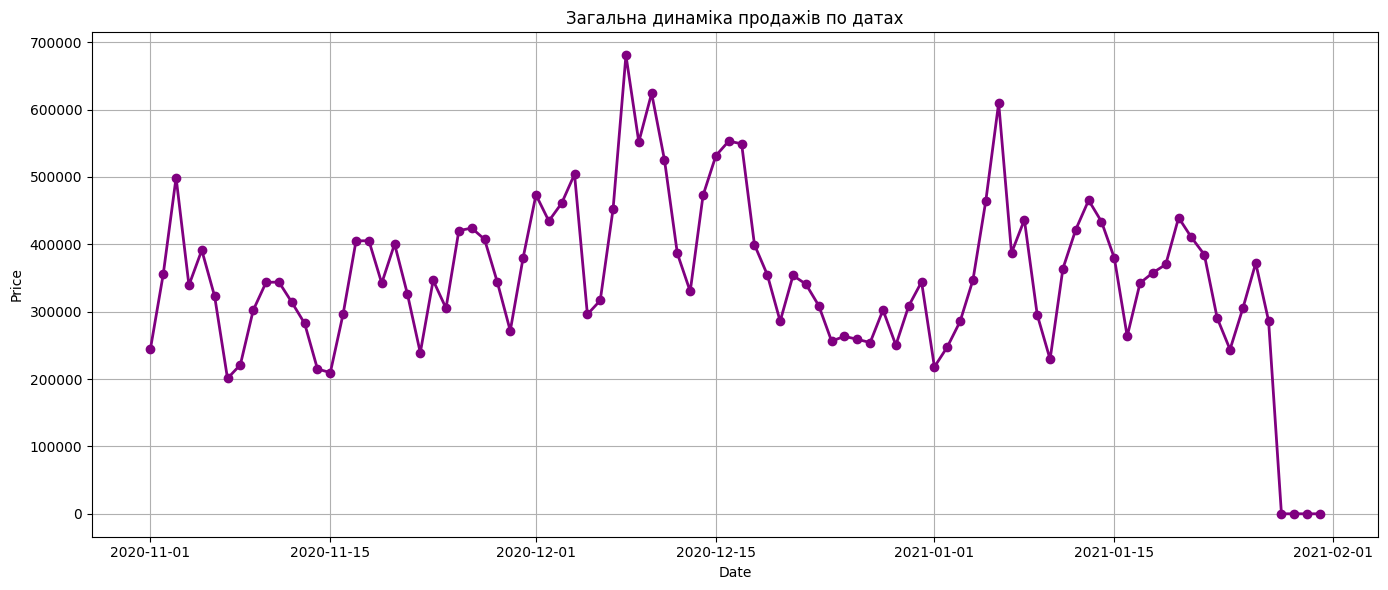

In [ ]:
daily_sales = df.groupby('date')['price'].sum().reset_index()

# 3. Побудова графіка
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['price'], color='purple', marker='o', linewidth=2)

plt.title('Загальна динаміка продажів по датах')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show()


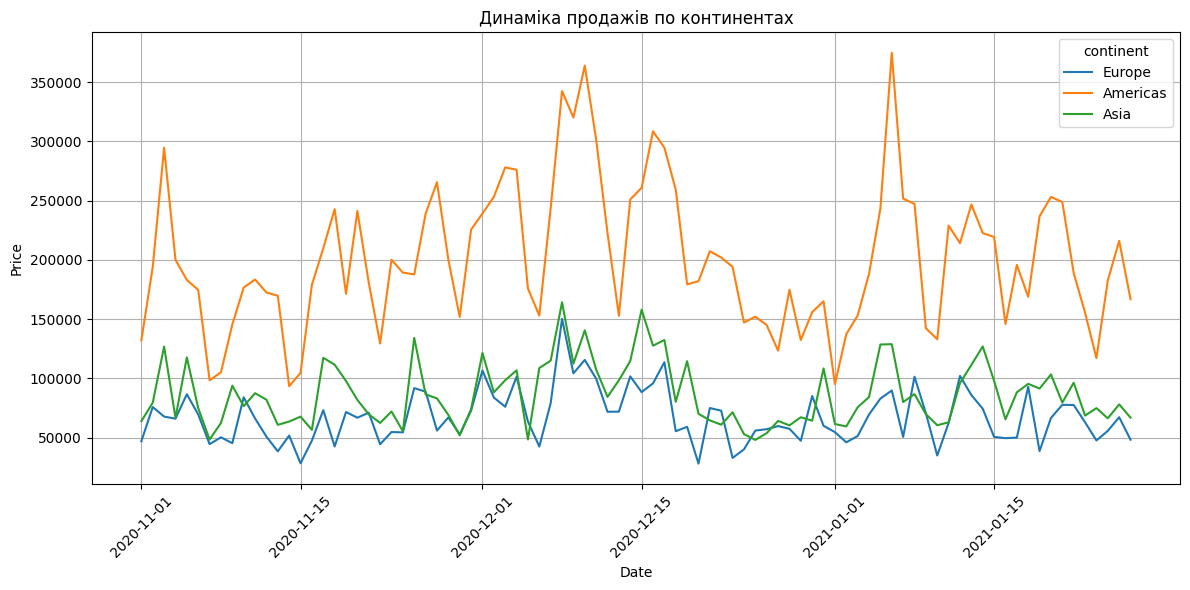

In [ ]:
# Обробка даних
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['date', 'price', 'continent'])  # прибираємо порожні значення
df = df[df['continent'].isin(['Asia', 'Europe', 'Americas'])]  # залишаємо лише три континенти
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])  # залишаємо лише ті, де є ціна

# Групування за датою і континентом
sales_by_date_continent = df.groupby([df['date'].dt.date, 'continent'])['price'].sum().unstack(fill_value=0)

# Побудова графіка
plt.figure(figsize=(12, 6))
for continent in ['Europe', 'Americas', 'Asia']:
    if continent in sales_by_date_continent.columns:
        plt.plot(sales_by_date_continent.index, sales_by_date_continent[continent], label=continent)

plt.title('Динаміка продажів по континентах')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='continent')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


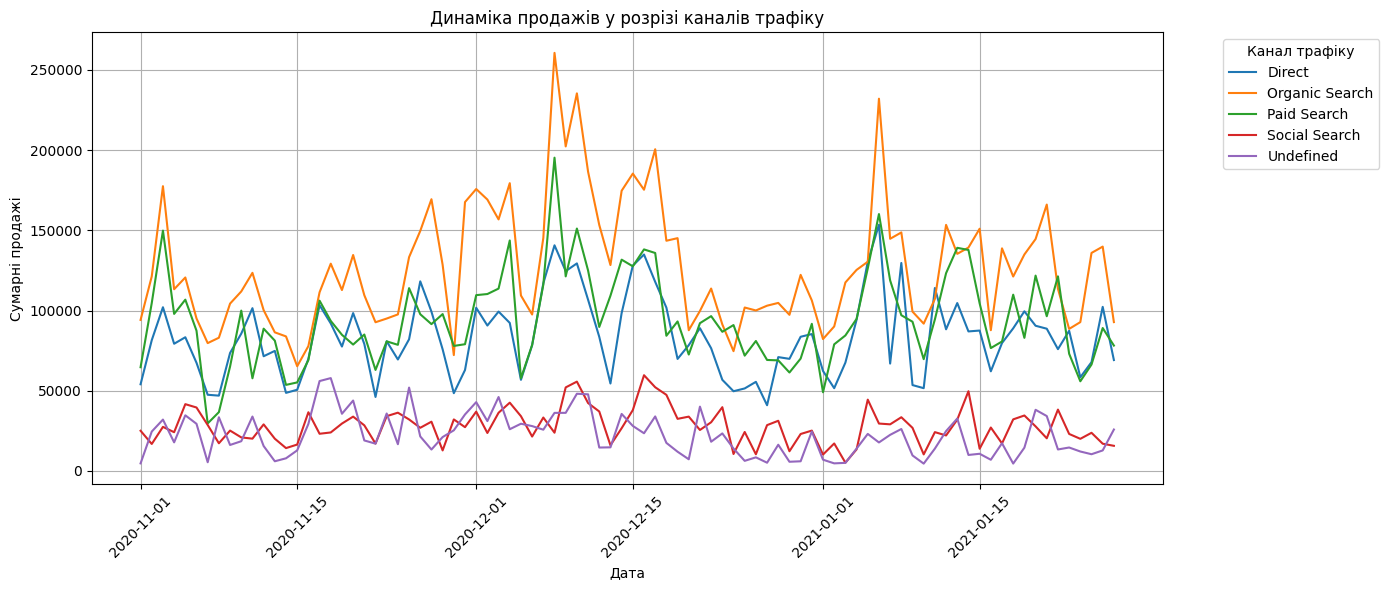

In [ ]:
# Обробка даних
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Фільтрація даних: виключаємо записи без дати, ціни або каналу
df = df.dropna(subset=['date', 'price', 'channel'])

# Групування: сума продажів по датах і каналах трафіку
sales_by_date_channel = df.groupby([df['date'].dt.date, 'channel'])['price'].sum().unstack(fill_value=0)

# Побудова графіка
plt.figure(figsize=(14, 6))
for channel in sales_by_date_channel.columns:
    plt.plot(sales_by_date_channel.index, sales_by_date_channel[channel], label=channel)

plt.title('Динаміка продажів у розрізі каналів трафіку')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='channel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


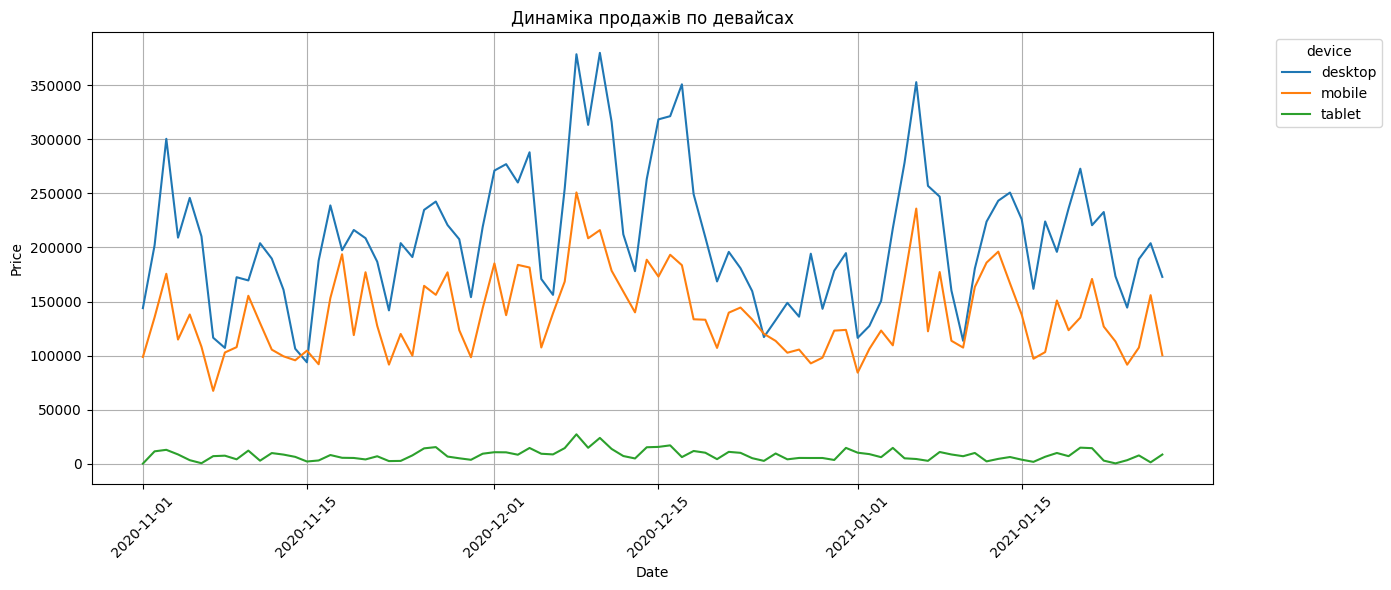

In [ ]:
# Обробка даних
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Фільтрація даних: виключаємо записи без дати, ціни або каналу
df = df.dropna(subset=['date', 'price', 'device'])

# Групування: сума продажів по датах і каналах трафіку
sales_by_date_channel = df.groupby([df['date'].dt.date, 'device'])['price'].sum().unstack(fill_value=0)

# Побудова графіка
plt.figure(figsize=(14, 6))
for channel in sales_by_date_channel.columns:
    plt.plot(sales_by_date_channel.index, sales_by_date_channel[channel], label=channel)

plt.title('Динаміка продажів по девайсах')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(title='device', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

*   найбільший обсяг продажів спостерігається в середині грудня та січня
*   в розрізі континентів в Америці продажі підвищуються в середині грудня - січня, в Європі та Азії з початку до середини грудня
*   по каналах продажів Direct, Organic Search та Paid Search показають підвищення продажів в середині грудня та січня по Social Search та Undefined ситуація суттєво не змінюється
*   по девайсах в середині грудня та січня продажі зромтають по desktop, mobile по tablet ситуація не змінюється

# Зведені таблиці

In [ ]:
filtered_df = df.dropna(subset=['channel', 'device'])
# Створення зведеної таблиці
pivot_table = pd.pivot_table(filtered_df, values='ga_session_id', index='channel', columns='device', aggfunc='nunique', fill_value=0)
print(pivot_table)

device          desktop  mobile  tablet
channel                                
Direct            47825   31745    1812
Organic Search    72622   49014    2789
Paid Search       55167   37034    2140
Social Search     16288   10988     638
Undefined         12527    8486     470


In [ ]:
# 1. Вибір топ-10 категорій за продажами
top_categories = df.groupby('category')['price'].sum().nlargest(10).index

# 2. Вибір топ-5 країн за продажами
top_countries = df.groupby('country')['price'].sum().nlargest(5).index

# 3. Фільтрація датафрейму по топ-категоріях і топ-країнах
filtered_df = df[df['category'].isin(top_categories) & df['country'].isin(top_countries)]

# 4. Створення зведеної таблиці
pivot_table = pd.pivot_table(filtered_df, values='price', index='category', columns='country', aggfunc='sum', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('Total', ascending=False)
pivot_table = pivot_table.drop(columns='Total')
print(pivot_table)


country                             Canada    France     India  \
category                                                         
Sofas & armchairs                 692427.5  187735.0  788430.0   
Chairs                            417740.8  134029.4  544309.2   
Beds                              354772.0  116414.0  358319.5   
Bookcases & shelving units        278981.9   73830.0  364507.4   
Cabinets & cupboards              181802.0   59101.5  191888.0   
Outdoor furniture                 185322.8   40486.4  162289.4   
Tables & desks                    132678.0   42299.0  186157.5   
Chests of drawers & drawer units   71952.0   21544.5   73111.0   
Bar furniture                      51724.0   11199.0   57657.0   
Children's furniture               30264.0   14258.0   39177.0   

country                           United Kingdom  United States  
category                                                         
Sofas & armchairs                       234812.0      3707144.5  
Chairs   

In [ ]:
# 1. Вибір топ-10 категорій за продажами
top_categories = df.groupby('category')['price'].sum().nlargest(10).index

# 2. Вибір топ-5 країн за продажами
top_countries = df.groupby('continent')['price'].sum().nlargest(5).index

# 3. Фільтрація датафрейму по топ-категоріях і топ-країнах
filtered_df = df[df['category'].isin(top_categories) & df['continent'].isin(top_countries)]

# 4. Створення зведеної таблиці
pivot_table = pd.pivot_table(filtered_df, values='price', index='category', columns='continent', aggfunc='sum', fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values('Total', ascending=False)
pivot_table = pivot_table.drop(columns='Total')
print(pivot_table)

continent                          Americas       Asia     Europe
category                                                         
Sofas & armchairs                 4737307.0  1950022.0  1491224.5
Chairs                            3309203.0  1524600.8  1178581.0
Beds                              2773094.0  1077325.5   925047.5
Bookcases & shelving units        1968919.3   945368.9   650889.5
Cabinets & cupboards              1275562.5   545369.5   468652.5
Outdoor furniture                 1213115.2   488607.6   399553.2
Tables & desks                     968129.0   464192.5   307045.0
Chests of drawers & drawer units   484290.0   210383.5   186793.0
Bar furniture                      406198.0   176684.0   131110.0
Children's furniture               253435.0   112389.0    93479.0


# Статистичний аналіз взаємозв’язків

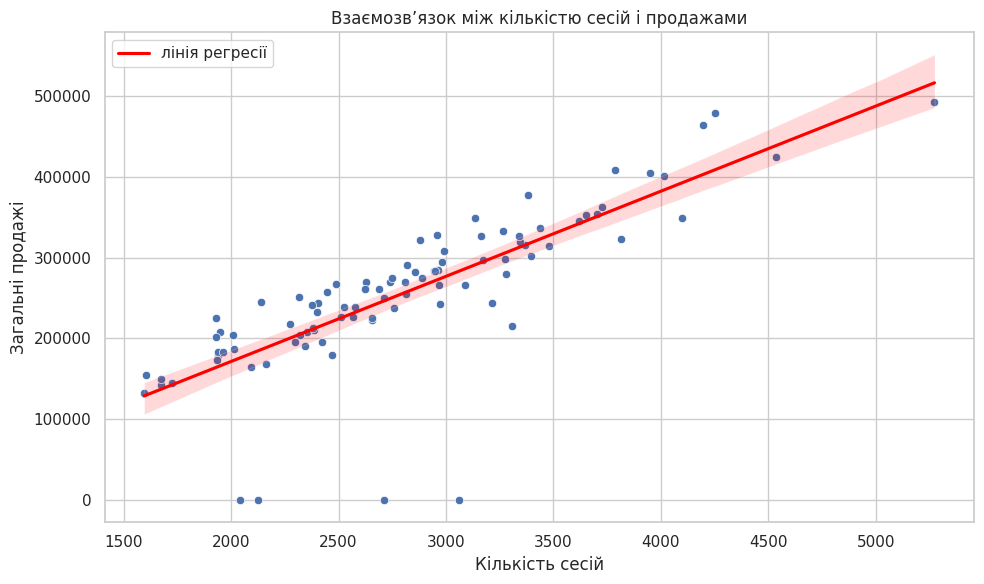

Коефіцієнт кореляції Пірсона: r = 0.7999, p-value = 0.00000
Кореляція статистично значуща.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# 1. Кількість сесій за кожну дату
session_counts = df.groupby('date')['ga_session_id'].nunique().reset_index(name='sessions')

# 2. Загальні продажі за дату
sales = df.groupby('date')['price'].sum().reset_index(name='total_sales')

# 3. Об'єднуємо
merged = pd.merge(session_counts, sales, on='date')

# 4. Візуалізація
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged, x='sessions', y='total_sales')
sns.regplot(data=merged, x='sessions', y='total_sales', scatter=False, color='red', label='лінія регресії')
plt.title('Взаємозв’язок між кількістю сесій і продажами')
plt.xlabel('Кількість сесій')
plt.ylabel('Загальні продажі')
plt.legend()
plt.tight_layout()
plt.show()

# 5. Коефіцієнт кореляції Пірсона
r, p_value = pearsonr(merged['sessions'], merged['total_sales'])
print(f"Коефіцієнт кореляції Пірсона: r = {r:.4f}, p-value = {p_value:.5f}")

# 6. Інтерпретація
if p_value < 0.05:
    print("Кореляція статистично значуща.")
else:
    print("Кореляція не є статистично значущою.")


Коефіцієнти кореляції між продажами на топ-3 континентах:
Americas ↔ Asia: r = 0.692, p = 0.00000 (кореляція статистично значуща)
Americas ↔ Europe: r = 0.670, p = 0.00000 (кореляція статистично значуща)
Asia ↔ Europe: r = 0.668, p = 0.00000 (кореляція статистично значуща)


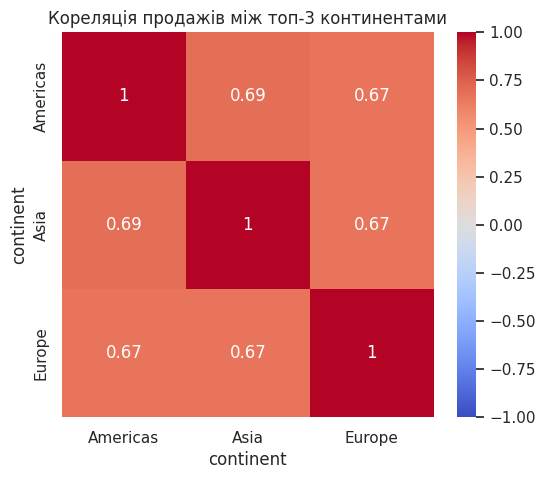

In [ ]:
# Крок 1: Топ-3 континенти за сумою продажів
top_continents = df.groupby('continent')['price'].sum().nlargest(3).index.tolist()

# Фільтруємо дані по топ-3 континентах
df_top = df[df['continent'].isin(top_continents)]

# Крок 2: Групуємо по датах та континентах
sales_by_date_continent = df_top.groupby(['date', 'continent'])['price'].sum().unstack()

# Крок 3: Кореляція між континентами
print("Коефіцієнти кореляції між продажами на топ-3 континентах:")

for i in range(len(top_continents)):
    for j in range(i+1, len(top_continents)):
        cont1 = top_continents[i]
        cont2 = top_continents[j]

        # Виключаємо NaN
        valid_data = sales_by_date_continent[[cont1, cont2]].dropna()

        corr_coef, p_value = pearsonr(valid_data[cont1], valid_data[cont2])

        print(f"{cont1} ↔ {cont2}: r = {corr_coef:.3f}, p = {p_value:.5f}", end=' ')
        if p_value < 0.05:
            print("(кореляція статистично значуща)")
        else:
            print("(кореляція не є статистично значущою)")

# Опціонально: візуалізуємо теплову карту кореляції
corr_matrix = sales_by_date_continent.corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляція продажів між топ-3 континентами')
plt.show()

Коефіцієнти кореляції між продажами за каналами трафіку:
Direct ↔ Organic Search: r = 0.775, p = 0.00000 (кореляція статистично значуща)
Direct ↔ Paid Search: r = 0.724, p = 0.00000 (кореляція статистично значуща)
Direct ↔ Social Search: r = 0.481, p = 0.00000 (кореляція статистично значуща)
Direct ↔ Undefined: r = 0.447, p = 0.00001 (кореляція статистично значуща)
Organic Search ↔ Paid Search: r = 0.799, p = 0.00000 (кореляція статистично значуща)
Organic Search ↔ Social Search: r = 0.439, p = 0.00002 (кореляція статистично значуща)
Organic Search ↔ Undefined: r = 0.435, p = 0.00002 (кореляція статистично значуща)
Paid Search ↔ Social Search: r = 0.447, p = 0.00001 (кореляція статистично значуща)
Paid Search ↔ Undefined: r = 0.415, p = 0.00006 (кореляція статистично значуща)
Social Search ↔ Undefined: r = 0.364, p = 0.00049 (кореляція статистично значуща)


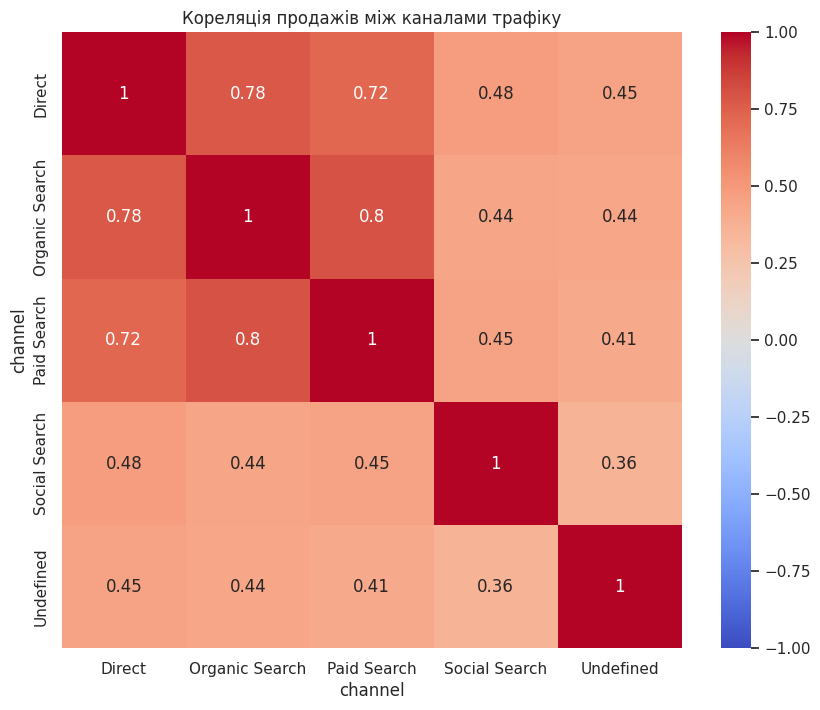

In [ ]:
# Крок 1 та 2: Групуємо та розкладаємо в ширину
sales_by_date_channel = df.groupby(['date', 'channel'])['price'].sum().unstack()

# Крок 3: Обчислюємо кореляції і статистичну значущість
channels = sales_by_date_channel.columns.tolist()

print("Коефіцієнти кореляції між продажами за каналами трафіку:")

for i in range(len(channels)):
    for j in range(i+1, len(channels)):
        ch1 = channels[i]
        ch2 = channels[j]

        valid_data = sales_by_date_channel[[ch1, ch2]].dropna()

        corr_coef, p_value = pearsonr(valid_data[ch1], valid_data[ch2])

        print(f"{ch1} ↔ {ch2}: r = {corr_coef:.3f}, p = {p_value:.5f}", end=' ')
        if p_value < 0.05:
            print("(кореляція статистично значуща)")
        else:
            print("(кореляція не є статистично значущою)")

# Крок 4: Візуалізація матриці кореляції
corr_matrix = sales_by_date_channel.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляція продажів між каналами трафіку')
plt.show()


Коефіцієнти кореляції між продажами топ-5 категорій товарів:
Beds ↔ Bookcases & shelving units: r = 0.582, p = 0.00000 (кореляція статистично значуща)
Beds ↔ Cabinets & cupboards: r = 0.503, p = 0.00000 (кореляція статистично значуща)
Beds ↔ Chairs: r = 0.563, p = 0.00000 (кореляція статистично значуща)
Beds ↔ Sofas & armchairs: r = 0.499, p = 0.00000 (кореляція статистично значуща)
Bookcases & shelving units ↔ Cabinets & cupboards: r = 0.540, p = 0.00000 (кореляція статистично значуща)
Bookcases & shelving units ↔ Chairs: r = 0.638, p = 0.00000 (кореляція статистично значуща)
Bookcases & shelving units ↔ Sofas & armchairs: r = 0.661, p = 0.00000 (кореляція статистично значуща)
Cabinets & cupboards ↔ Chairs: r = 0.565, p = 0.00000 (кореляція статистично значуща)
Cabinets & cupboards ↔ Sofas & armchairs: r = 0.671, p = 0.00000 (кореляція статистично значуща)
Chairs ↔ Sofas & armchairs: r = 0.570, p = 0.00000 (кореляція статистично значуща)


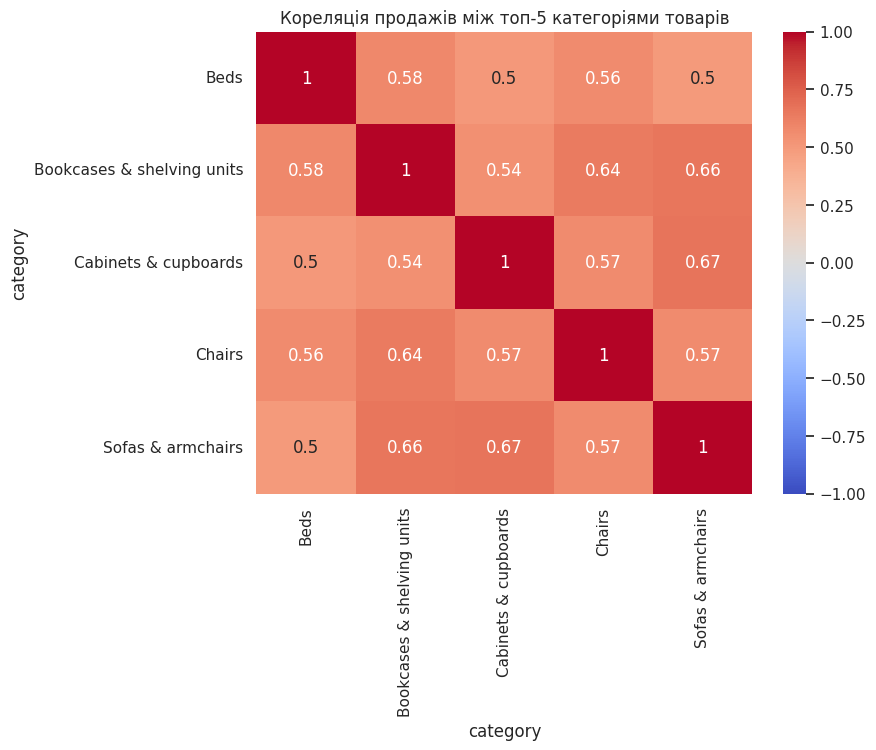

In [ ]:
# Крок 1: Визначаємо топ-5 категорій за сумою продажів
top_categories = df.groupby('category')['price'].sum().nlargest(5).index.tolist()

# Фільтруємо дані по топ-5 категоріях
df_top = df[df['category'].isin(top_categories)]

# Крок 2: Групуємо по датах і категоріях, розкладаємо в ширину
sales_by_date_category = df_top.groupby(['date', 'category'])['price'].sum().unstack()

# Крок 3: Кореляції між категоріями
print("Коефіцієнти кореляції між продажами топ-5 категорій товарів:")

categories = sales_by_date_category.columns.tolist()

for i in range(len(categories)):
    for j in range(i+1, len(categories)):
        cat1 = categories[i]
        cat2 = categories[j]

        valid_data = sales_by_date_category[[cat1, cat2]].dropna()

        corr_coef, p_value = pearsonr(valid_data[cat1], valid_data[cat2])

        print(f"{cat1} ↔ {cat2}: r = {corr_coef:.3f}, p = {p_value:.5f}", end=' ')
        if p_value < 0.05:
            print("(кореляція статистично значуща)")
        else:
            print("(кореляція не є статистично значущою)")

# Крок 4: Візуалізація матриці кореляції
corr_matrix = sales_by_date_category.corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Кореляція продажів між топ-5 категоріями товарів')
plt.show()


*   загальні показники продажів та кількості сесій мають між собою позитивну статистично значущу кореляцію

*   між континентами Америкою, Європою та Азією також є статистично значуща кореляція

*   між каналами трафіку Direct, Organic Search, Paid Search, Social Search, Undefined є статичтино значуща кореляція

*   між топ-5 категорій товарів Beds, Bookcases & shelving units, Cabinets & cupboards, Chairs, Sofas & armchairs є статистично значуща кореляція               

# Статистичний аналіз відмінностей між групами

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

# 2. Вибірки
registered = df[df['account_id'].notna()]
unregistered = df[df['account_id'].isna()]

# 3. Агрегація продажів
registered_sales = registered.groupby('date')['price'].sum().reset_index(name='total_sales')
unregistered_sales = unregistered.groupby('date')['price'].sum().reset_index(name='total_sales')
registered_sales['user_type'] = 'registered'
unregistered_sales['user_type'] = 'unregistered'
combined = pd.concat([registered_sales, unregistered_sales], ignore_index=True)



# 5. Тест на нормальність
r_vals = combined[combined['user_type'] == 'registered']['total_sales']
u_vals = combined[combined['user_type'] == 'unregistered']['total_sales']
print("Shapiro-Wilk test:")
print("Registered:", shapiro(r_vals))
print("Unregistered:", shapiro(u_vals))

# 6. Статистичний тест
print("\nStatistical test for difference:")
if shapiro(r_vals).pvalue > 0.05 and shapiro(u_vals).pvalue > 0.05:
    print("Дані нормальні → t-test:")
    result = ttest_ind(r_vals, u_vals, equal_var=False)
else:
    print("Ненормальні розподіли → Mann-Whitney U:")
    result = mannwhitneyu(r_vals, u_vals, alternative='two-sided')
print(result)


Shapiro-Wilk test:
Registered: ShapiroResult(statistic=np.float64(0.9700425568102413), pvalue=np.float64(0.03912618250388385))
Unregistered: ShapiroResult(statistic=np.float64(0.9575463418383037), pvalue=np.float64(0.004442956750894592))

Statistical test for difference:
Ненормальні розподіли → Mann-Whitney U:
MannwhitneyuResult(statistic=np.float64(352.0), pvalue=np.float64(3.8805185465235906e-26))


          channel  session_count
1  Organic Search         124425
2     Paid Search          94341
0          Direct          81382
3   Social Search          27914
4       Undefined          21483


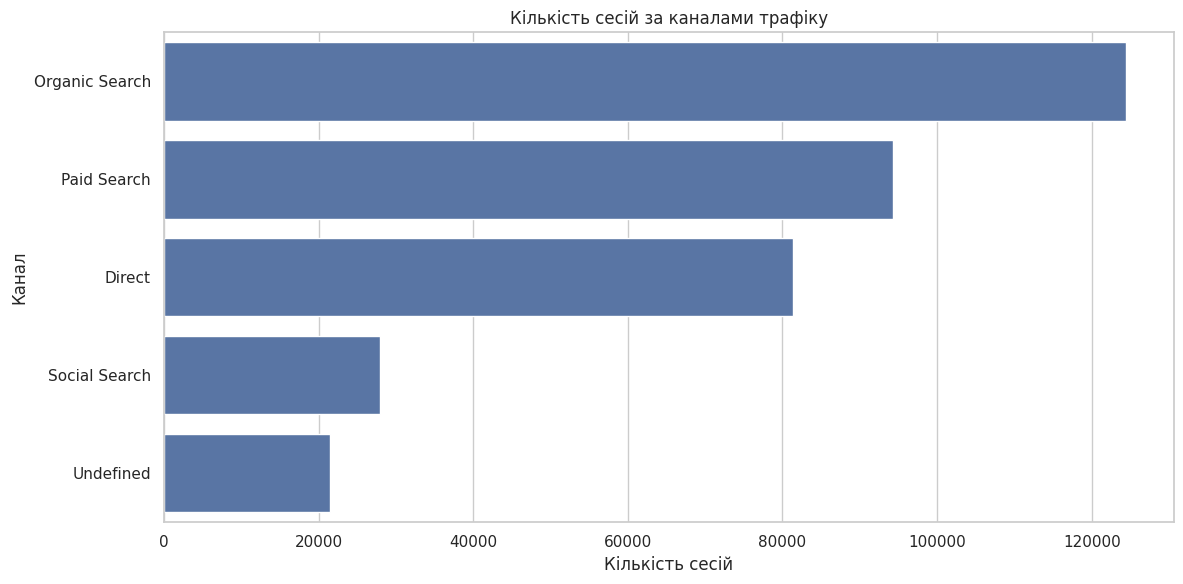


Kruskal-Wallis test:
Statistic = 368.981, p-value = 0.00000
Різниця між каналами статистично значуща.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kruskal
# Фільтрація даних
df = df[df['channel'].notna()]

# Кількість сесій по кожному каналу
channel_counts = df.groupby('channel')['ga_session_id'].count().reset_index(name='session_count')
print(channel_counts.sort_values(by='session_count', ascending=False))

# Візуалізація
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='channel', order=channel_counts.sort_values(by='session_count', ascending=False)['channel'])
plt.title("Кількість сесій за каналами трафіку")
plt.xlabel("Кількість сесій")
plt.ylabel("Канал")
plt.tight_layout()
plt.show()

# Підготовка до тесту: кількість сесій на день для кожного каналу
session_by_day_channel = (df.groupby(['date', 'channel'])['ga_session_id'].count().reset_index(name='sessions'))

# Побудова списку вибірок для кожного каналу
channel_groups = session_by_day_channel.groupby('channel')['sessions'].apply(list)

# Статистичний тест: Kruskal-Wallis (непараметричний тест для кількох незалежних груп)
stat, p = kruskal(*channel_groups)
print("\nKruskal-Wallis test:")
print(f"Statistic = {stat:.3f}, p-value = {p:.5f}")

if p < 0.05:
    print("Різниця між каналами статистично значуща.")
else:
    print("Немає статистично значущих відмінностей між каналами.")


In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Фільтрація лише для Європи та Америки
df = df[df['continent'].isin(['Europe', 'Americas'])]

# Загальна кількість сесій за континентами
total_sessions = df.groupby('continent')['ga_session_id'].count()

# Кількість органічних сесій за континентами
organic_sessions = df[df['channel'] == 'Organic Search'].groupby('continent')['ga_session_id'].count()

# Обчислимо абсолютні значення
count = [organic_sessions.get('Europe', 0), organic_sessions.get('Americas', 0)]
nobs = [total_sessions.get('Europe', 0), total_sessions.get('Americas', 0)]

# Вивід даних
print(f"Органічний трафік у Європі: {count[0]} з {nobs[0]}")
print(f"Органічний трафік в Америці: {count[1]} з {nobs[1]}")

# Z-тест для пропорцій
stat, pval = proportions_ztest(count, nobs)
print(f"\nZ-statistic = {stat:.4f}, p-value = {pval:.5f}")

if pval < 0.05:
    print("Різниця у долі органічного трафіку між Європою та Америкою статистично значуща.")
else:
    print("Різниця не є статистично значущою.")


Органічний трафік у Європі: 23195 з 65135
Органічний трафік в Америці: 68671 з 193179

Z-statistic = 0.2895, p-value = 0.77219
Різниця не є статистично значущою.


* різниця між кількістю продажів зареєстрованих та незареєстрованих користувачів є статистично значущою  

*   аналіз кількості сесій по каналах трафіку  Organic Search, Paid Search, Direct, Social Search, Undefined показав статистично значущий результат
*   результат тесту показав, що різниця органічних сесій в Європі та Америці не є статистично значущою


[аналітичний дешборд](https://public.tableau.com/app/profile/olena.polivoda/viz/Book1_17539849123200/Dashboard1)